# Getting the already list data from parltrack

Download file and uncompress using lzip https://parltrack.org/dumps/ep_meps.json.lz then transform to json

Create the dataset

In [149]:
import pandas as pd
df = pd.read_json('my_file.json', orient='records')

Creating a tag to know which MEP has not been re-elected after the 9th term

In [150]:
df['new_unemployed'] = False
for i in range(len(df.index)):
    #print(f'{i} - {df.Constituencies[i]}')
    if (type(df.Constituencies[i]) is not list) or (df.Constituencies[i][-1] is None):
        print(f'MEP {i} has a problem in the datastructure')
    elif df.Constituencies[i][-1]['term']==9:
        df.at[i,'new_unemployed'] = True

MEP 13 has a problem in the datastructure
MEP 1598 has a problem in the datastructure
MEP 4584 has a problem in the datastructure


While we are here, looking a a few things

Of all the MEP, 11.8% of them ended at their 9th term

<Axes: ylabel='count'>

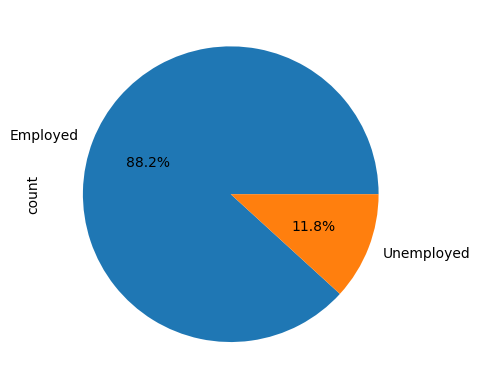

In [151]:
df['new_unemployed'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Employed', 'Unemployed'])

In [152]:
df['reconducted'] = False
for i in range(len(df.index)):
    #print(f'{i} - {df.Constituencies[i]}')
    if (type(df.Constituencies[i]) is not list) or (df.Constituencies[i][-1] is None):
        print(f'MEP {i} has a problem in the datastructure')
    elif (len(df.Constituencies[i])<2):
        pass
    elif (df.Constituencies[i][-1]['term'] == 10):
        for j in range(len(df.Constituencies[i])):
            if df.Constituencies[i][j]['term'] == 9:
                df.at[i,'reconducted'] = True
                pass

MEP 13 has a problem in the datastructure


MEP 1598 has a problem in the datastructure
MEP 4584 has a problem in the datastructure


In [153]:
print(f'About {len(df[(df.new_unemployed == True)])/(len(df[(df.new_unemployed == True)])+len(df[df.reconducted==True]))*100:.2f}% of MEP form the 9th term lost their job')

About 61.78% of MEP form the 9th term lost their job


Adding the twitter links from unregistered MEP twitter account

In [154]:
df2 = pd.read_excel('/mnt/2To/jupyter_data/FTM/Revolving_doors/input_tt.xlsx')

In [155]:
import numpy as np
# Transforming the values of the original df and adding the new usernames
for UserID in df[(df.new_unemployed == True) & (df.Twitter.notnull())]['UserID']:
    df.loc[df.UserID == UserID,'Twitter']=df[df.UserID == UserID].Twitter.values[0][0]
for UserID in df[(df.new_unemployed == True) & (df.Twitter.isnull())]['UserID']:
    if df2[df2.UserID == UserID]['twitter'].values[0] is not np.nan:
        df.loc[df.UserID == UserID,'Twitter'] = df2[df2.UserID == UserID]['twitter'].values[0]

In [156]:
import re
# Setting a regex to capture the username not the url
def extract_username(url):
    pattern = "(?:https?:\/\/)?(?:www\.)?(?:twitter\.com|x\.com)\/([A-Za-z0-9_]+)"
    match = re.search(pattern, url)
    if match:
        return match.group(1) 
    else:
        return None


In [157]:
df['Twitter_username'] = df[(df.new_unemployed == True) & (df.Twitter.notnull())].Twitter.apply(lambda x: extract_username(x))

In [180]:
# Saving this in a pickle
df.to_pickle('MEP-w-tt.pkl')